In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler,MinMaxScaler




# Example: Combine Random Forest, XGBoost, and SVM

# Load the data from the CSV file
data = pd.read_csv('Bmarrow_complete.csv')
data = pd.get_dummies(data, columns=['Disease'], drop_first=True)

data['ANC_recovered'] = np.where(data['ANCrecovery'] != 1000000, 1, 0)
data['PLT_recovered'] = np.where(data['PLTrecovery'] != 1000000, 1, 0)
data['time_to_aGvHD_III_IV'] = np.where(data['time_to_aGvHD_III_IV'] != 1000000, 1, 0)
#data['survival_status'] = 1-data['survival_status']
# Remove original columns
#data.drop(['ANCrecovery', 'PLTrecovery','time_to_aGvHD_III_IV'], axis=1, inplace=True)
# Assuming 'survival_status' is the response variable
X = data.drop(['survival_status','survival_time','Recipientageint','Recipientage10'], axis=1)
y = data['survival_status']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize different models
logistic_regression = LogisticRegression(random_state=42,max_iter=10000)
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
# List of models
models = [logistic_regression, decision_tree, random_forest]

# Train and evaluate each model
for model in models:
    # Train the model
    model.fit(X_train, y_train)
    cv_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    #accuracy = accuracy_score(y_test, y_pred)
    #report = classification_report(y_test, y_pred)

    # Print the results
    #print(f"Model: {model.__class__.__name__}")
    #print(f"Accuracy: {accuracy:.4f}")
    #print("Classification Report:")
    #print(report)
    #print("=" * 50)
    print(f"Model: {model.__class__.__name__}")
    print(f"Mean Accuracy: {np.mean(cv_scores):.4f}")
    print("Cross-Validation Scores:", cv_scores)
    print("=" * 50)


Model: LogisticRegression
Mean Accuracy: 0.6638
Cross-Validation Scores: [0.53333333 0.53333333 0.71428571 0.71428571 0.78571429 0.64285714
 0.57142857 0.64285714 0.78571429 0.71428571]
Model: DecisionTreeClassifier
Mean Accuracy: 0.7200
Cross-Validation Scores: [0.66666667 0.53333333 0.71428571 0.92857143 0.64285714 0.64285714
 0.64285714 0.64285714 0.78571429 1.        ]
Model: RandomForestClassifier
Mean Accuracy: 0.6976
Cross-Validation Scores: [0.66666667 0.66666667 0.78571429 0.71428571 0.64285714 0.71428571
 0.64285714 0.71428571 0.78571429 0.64285714]
Model: AdaBoostClassifier
Mean Accuracy: 0.6900
Cross-Validation Scores: [0.66666667 0.73333333 0.85714286 0.57142857 0.78571429 0.57142857
 0.64285714 0.78571429 0.71428571 0.57142857]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Model: MLPClassifier
Mean Accuracy: 0.6276
Cross-Validation Scores: [0.46666667 0.66666667 0.71428571 0.71428571 0.57142857 0.71428571
 0.5        0.71428571 0.71428571 0.5       ]
Model: SVC
Mean Accuracy: 0.6619
Cross-Validation Scores: [0.66666667 0.66666667 0.71428571 0.71428571 0.64285714 0.64285714
 0.64285714 0.64285714 0.64285714 0.64285714]
[LightGBM] [Info] Number of positive: 34, number of negative: 65
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000081 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 283
[LightGBM] [Info] Number of data points in the train set: 99, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.343434 -> initscore=-0.648027
[LightGBM] [Info] Start training from score -0.648027
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

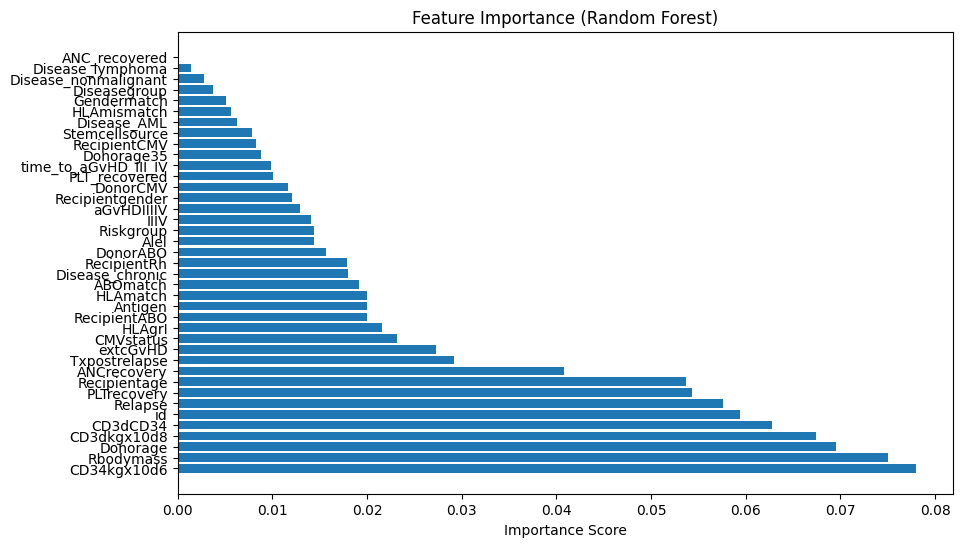

In [ ]:
import matplotlib.pyplot as plt
# Get feature importances

feature_importances = decision_tree.feature_importances_
feature_importances2 = random_forest.feature_importances_
# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances2
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance Score')
plt.title('Feature Importance (Random Forest)')
plt.show()


In [ ]:
X_train.head()

,id,Recipientgender,Stemcellsource,Donorage,Donorage35,IIIV,Gendermatch,DonorABO,RecipientABO,RecipientRh,...,Rbodymass,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,Disease_AML,Disease_chronic,Disease_lymphoma,Disease_nonmalignant,ANC_recovered,PLT_recovered
82,109,1,1,42.049315,1,0,1,1,0,1,...,52.7,10,42,0,1,0,0,0,1,1
28,38,0,1,43.517808,1,0,0,0,-1,1,...,10.5,16,16,0,0,1,0,0,1,1
40,52,1,1,33.120548,0,0,0,0,0,0,...,28.5,14,14,0,0,0,0,0,1,1
85,114,1,1,28.723288,0,1,0,1,-1,0,...,25.0,14,14,0,0,1,0,0,1,1
24,34,1,1,23.446575,0,0,0,-1,0,1,...,49.6,17,16,0,0,0,0,1,1,1


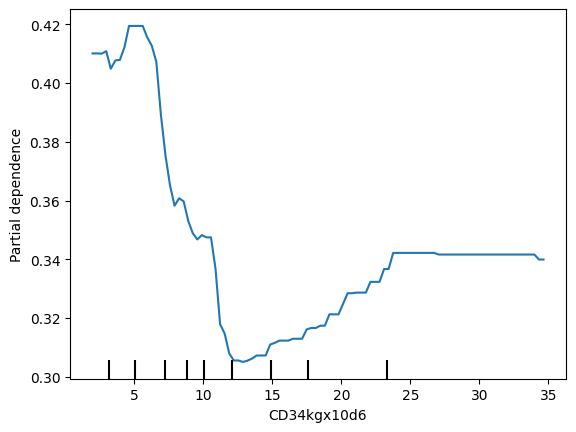

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

feature_of_interest_index = 26  # Change this to the actual index

display = PartialDependenceDisplay.from_estimator(
    random_forest, X, features=[(feature_of_interest_index,)]
)



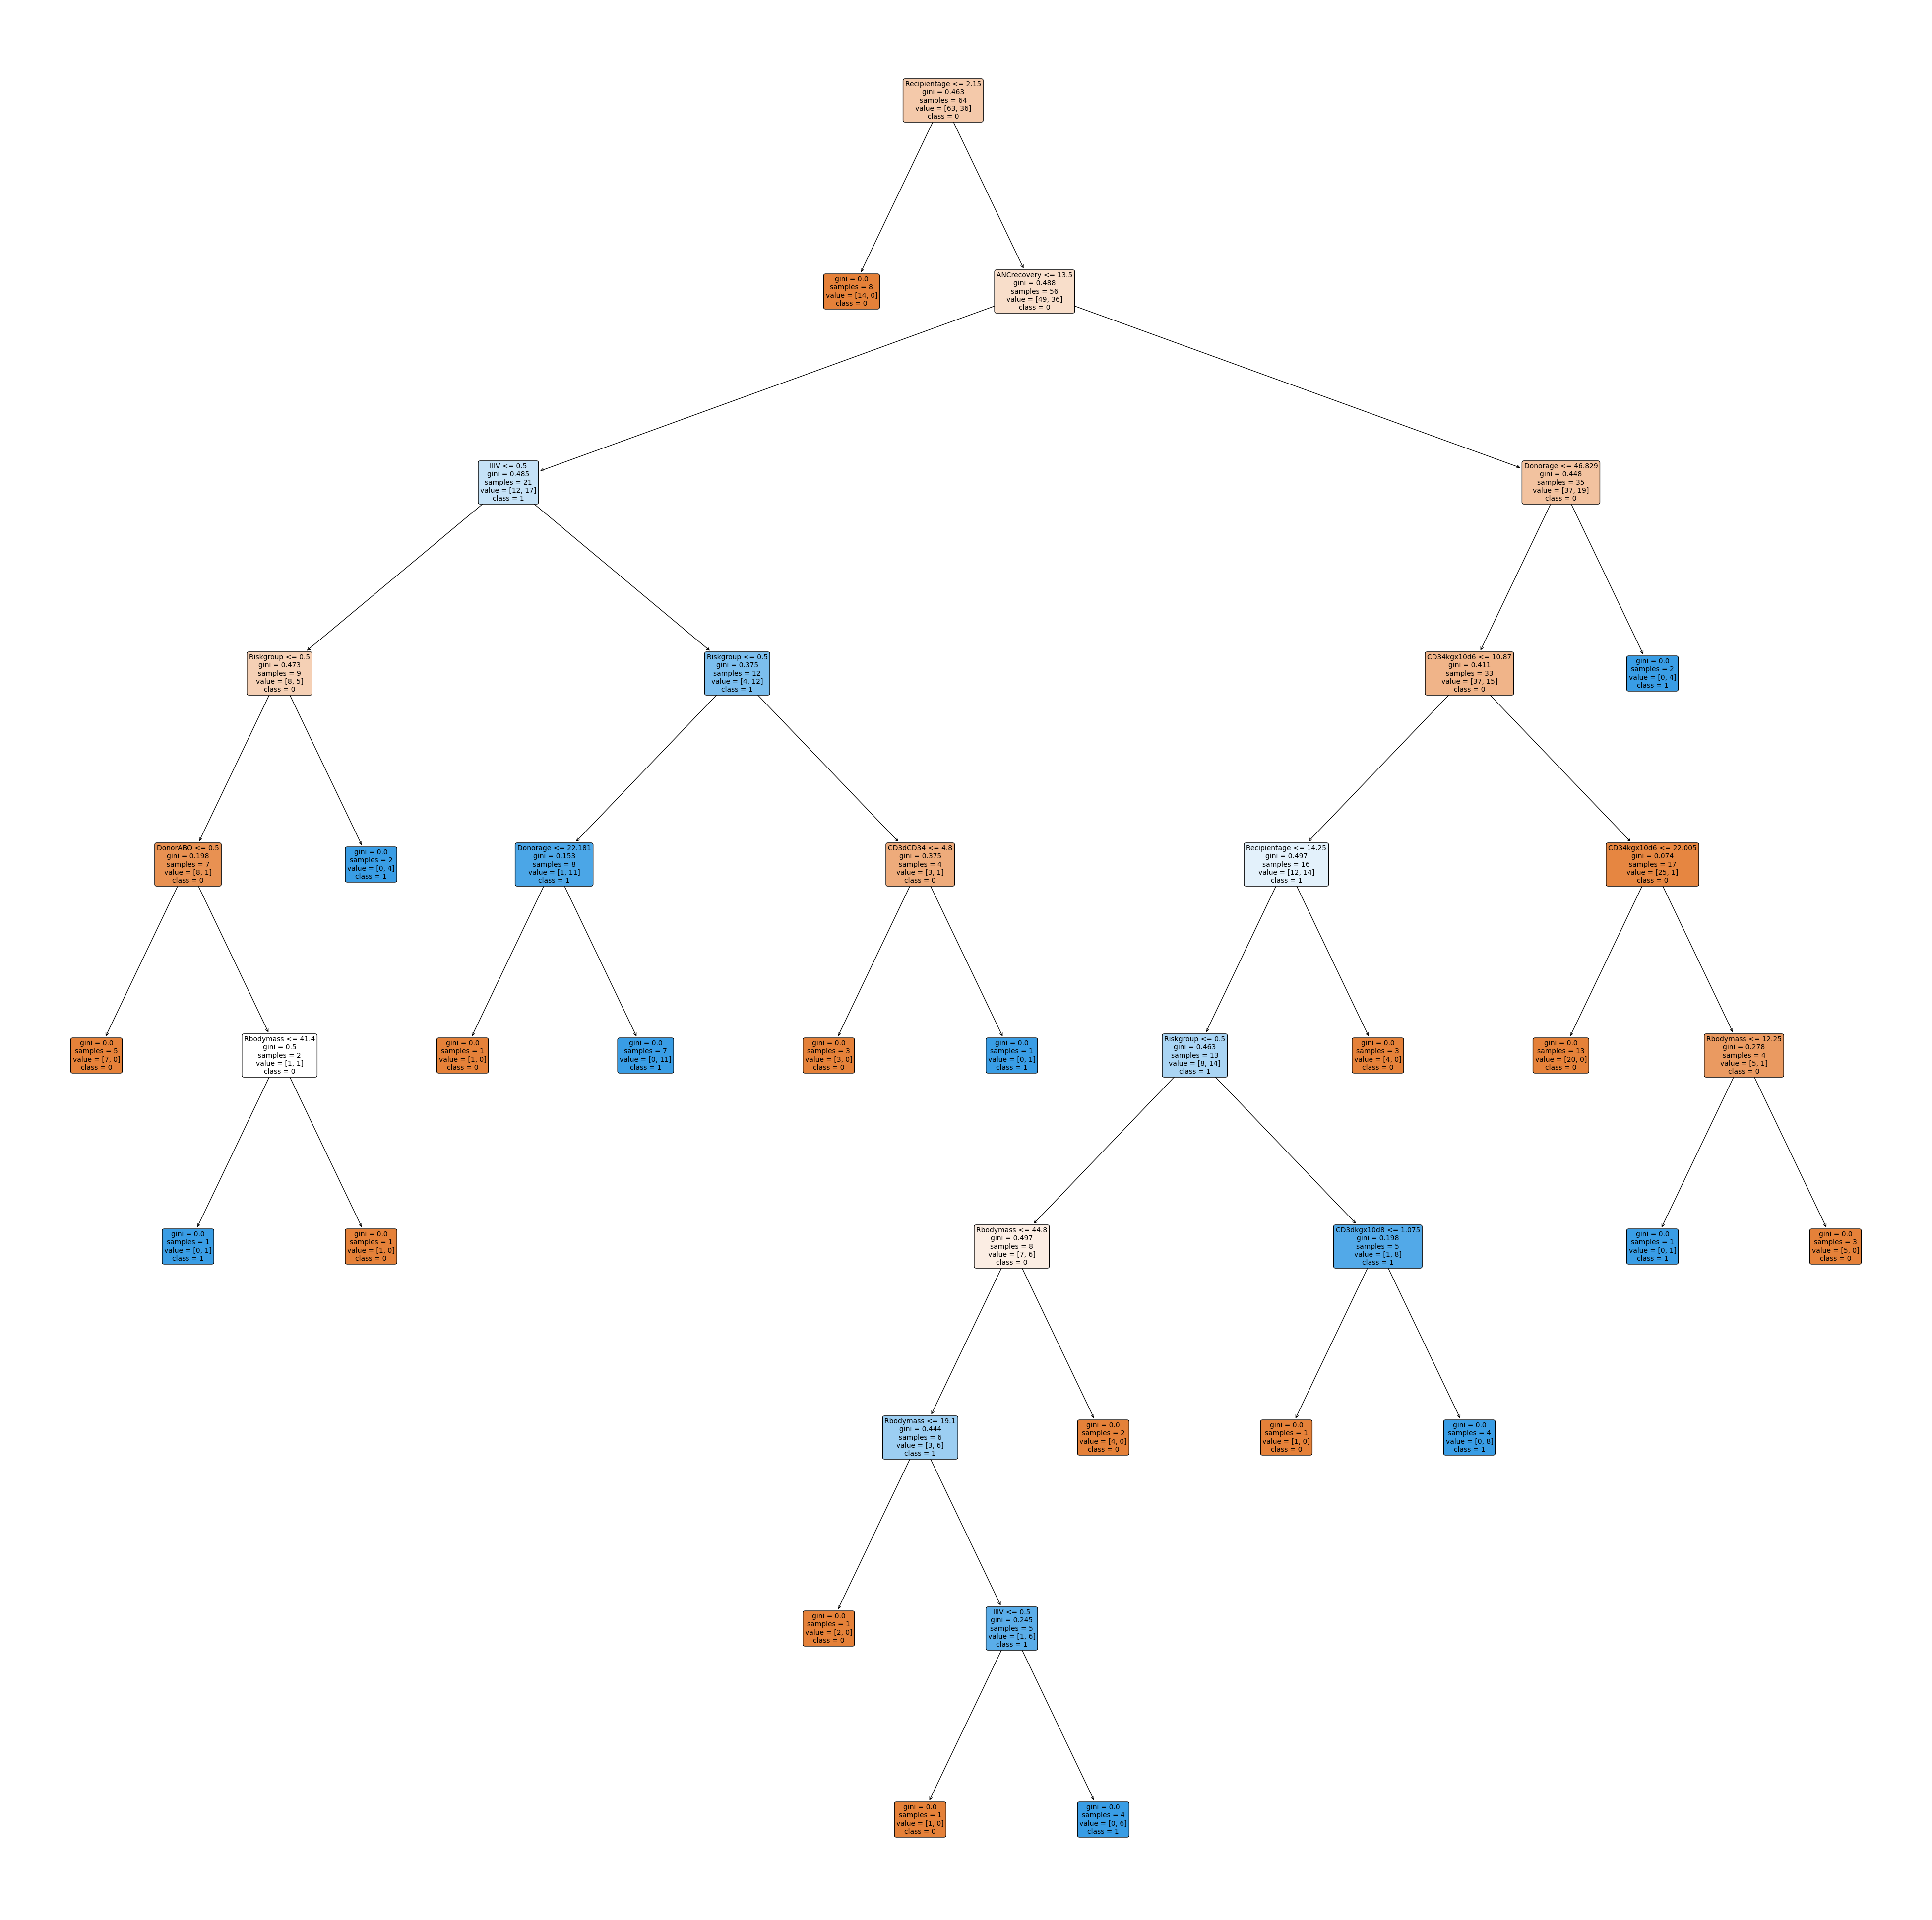

In [ ]:
from sklearn.tree import plot_tree

# Assuming 'dt_model' is your trained Decision Tree model
plt.figure(figsize=(50,50))
plot_tree(random_forest.estimators_[0], filled=True, feature_names=X.columns, class_names=['0', '1'], rounded=True, fontsize=10)
plt.show()

